### Law of Large Numbers (LLN)

Consider a random experiment which yields a particular result of interest. Every time we perform (or in cs terms "run") the experiment, we observe the yielded result. We can use the language of probability to model this situation. Consider that we may observe a range of possible values and we may refer to the observations as a random variable $X$ which is distributed in accordance to a probability distribution $f_{X}$. Probability distribution assigns certain weights or densities to each possible value of $X$ which we may regard as the "strenght of belief" in a particular result arising.
  For instance, suppose that $X$ is Poisson distributed with mean $\lambda$. Then its pdf is given by
         $$f_{X} ( x ) = \frac{e^{ - \lambda } \lambda^{x} }{ x! }.$$

We are interested in the expected value of our observations. In this case, the calculation is straightforward:
\begin{equation}
\begin{split}
\mathbb{E} [ X ] & = \sum_{x=0}^{\infty} f_{X} (x) x \\
                & = e^{ - \lambda } \sum_{ x = 1 }^{ \infty } \frac{ \lambda^{x} }{ (x-1)! } \\
                & = e^{ - \lambda } \lambda e^{ \lambda } \\
                & = \lambda. \\
\end{split}
\end{equation}

The Law of Large basically tells us that if we perform the experiment $N$ times and we observe the values $X_{1} , \dots , X_{N}$, then the sample average $\sum_{i=1}^{N} X_{i} / N$ converges to the theoretical expected value $\mathbb{E} [ X ]$ as the sample size $N$ (the times which we "run" the experiment) increases. Thus, the more samples the better the accuracy. Hence,
            $$\frac{1}{N} \sum_{i=1}^{N} X_{i} \approx \mathbb{E} [ X ].$$
Note that the sample average is not a fixed quantity but a random variable which can yield a range of possible results and that range is dependant on the sample size. Sample size has its own unique distribution which can be analytically computed via convolutions. Although, as will see below, theres a general characterization of sample averages distributions - the celebrated Central Limit Theorem (CLT). A sufficiently high sample size diminishes the range of possible results. Moreover, its expected value can also be calculated as follows: due to linearity of the operator we have
     \begin{equation}
     \mathbb{E} \left[ \frac{1}{N} \sum_{i=1}^{N} X_{i} \right] = \frac{N \mathbb{E} [X] }{N} = \mathbb{E} [ X ].
     \end{equation}
Furthermore, note that
   \begin{equation}
   Var [ E ] = \frac{ N Var [ X_{i} ] }{ N^{2} } = \frac{ Var[X] }{ N } \\
   \end{equation}
and consequently
   \begin{equation}
   \sigma = \sqrt{ Var [ E ] } = \frac{ \sigma_{X} }{ \sqrt{N} }.
   \end{equation}
We can easily see that the standard deviation fades away as the sample size gets arbitrarily large. 
      The basic understanding of LLN is that extreme fluctuations cancel themselves out as the number of experiments increases arbitrarily. Its basically a theorem about the destination and not the journey.  The journey might be rough at first but eventually it smoothes out. LLN is a generalization of our understanding of the basic definition of the probability $p$ of an event arising out of a list of possible events which a random experiment can yield. If we perform the experiment a sufficiently number of times, then its probability $p$ is given by the ratio of the times it arose versus the total number of experiments. Let $X$ be our observed quantity and we the event arises we assign the value 1 and 0 otherwise - that is a bernoulli experiment. Suppose we run the experiment $N$ times. Then, we can see that
        $$\frac{1}{N} \sum_{i=1}^{N} X_{i} \approx \mathbb{E} [ X ] = p \cdot 1 + ( 1 - p ) \cdot 0 = p.$$
Below we implement these ideas using Python.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats
import scipy.special
import math
import pandas as pd
from matplotlib.pyplot import rcParams , figure
plt.style.use('seaborn')
plt.tight_layout()
figure(figsize=(16,12))
%matplotlib inline

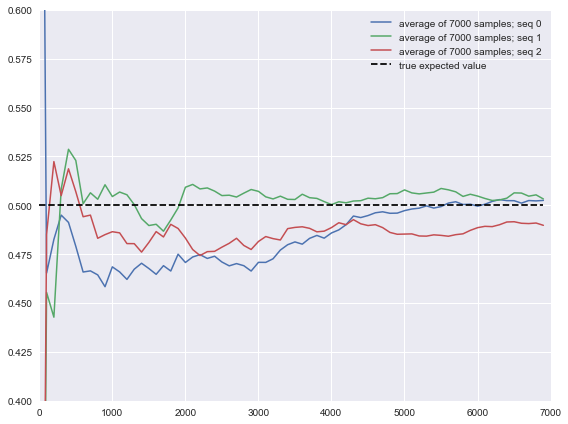

In [2]:
sample_size = 7000
expected_value = _lambda = 0.5
poi = np.random.poisson
N_samples = range(1,sample_size,100)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sample_error = []
for k in range(3):
    
    samples = poi(_lambda , sample_size)
    sample_average = [samples[:i].mean() for i in N_samples]
    error = [avg - _lambda for avg in sample_average]
    sample_error.append([(avg - _lambda)**2 for avg in sample_average])
    ax.plot(N_samples,sample_average,lw=1.5,label=f'average of {sample_size} samples; seq {k}')
    
ax.plot(N_samples,
        np.ones(len(N_samples))*_lambda ,
        linestyle = '--',
        zorder=4,
        color='black',
       label = 'true expected value')
xmin , xmax = 0 , sample_size
ymin , ymax = _lambda - 0.1 , 0.1 + _lambda
ax.set_ylim([ymin, ymax])
ax.set_xlim([xmin, xmax])    
ax.legend(loc=0)
fig.tight_layout()

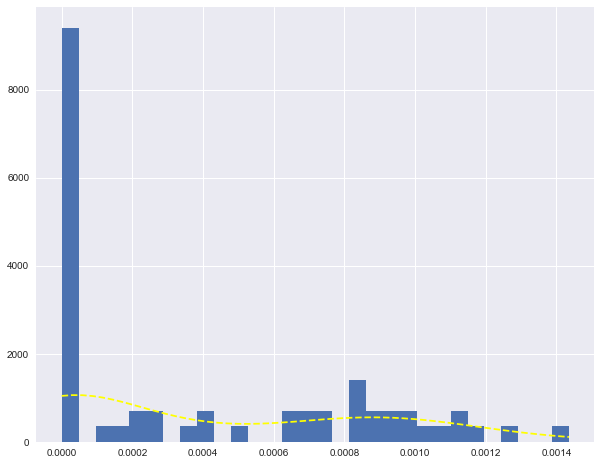

In [3]:
fig , ax = plt.subplots(1,1,figsize=(10,8))
data = sample_error[0][10:]
density = scipy.stats.gaussian_kde(data)
xs = np.linspace(min(data),max(data))
ax.hist(data,bins=30,density=True)
ax.plot(xs,density(xs),linestyle='--',color='yellow',label='kde')

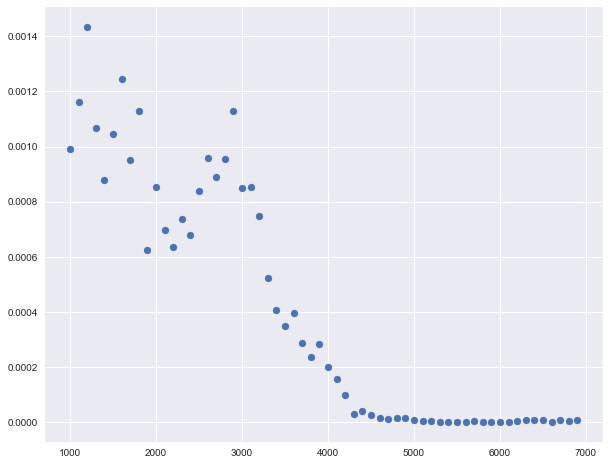

In [4]:
fig , ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(N_samples[10:],sample_error[0][10:])

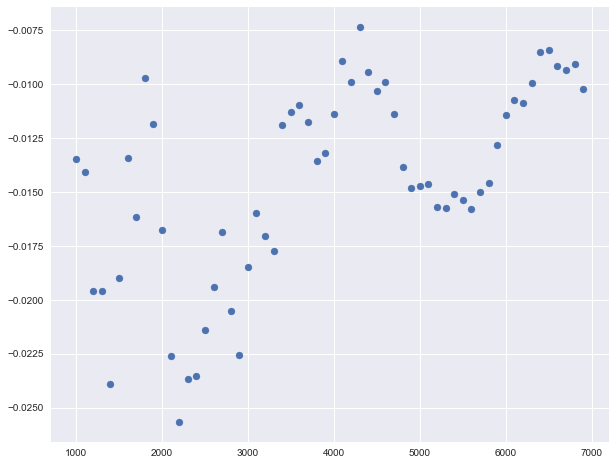

In [5]:
fig , ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(N_samples[10:],error[10:])

Text(0.5, 1.0, 'Probability Ray Gun')

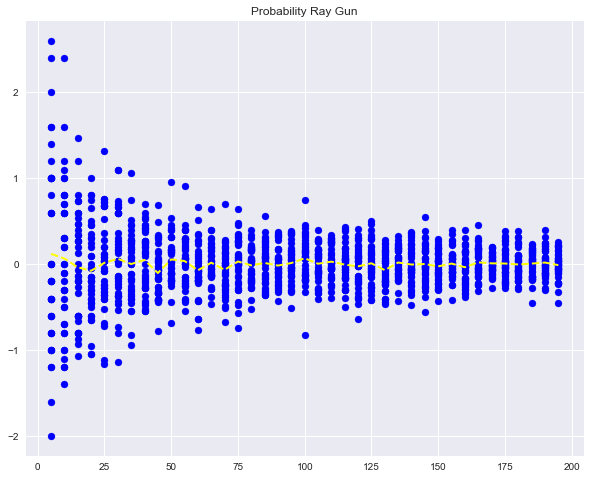

In [96]:
import time
fig , ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
_lambda = 5
sample_size = 40
iterations = np.arange(5,200,5)
results = np.zeros(shape=(sample_size,1))
total_means = []

for i in iterations:
    samples = poi(_lambda , size = ( sample_size , i ) )
    means = samples.mean(axis=1)
    means = means.reshape((len(means),1))
    errors = np.apply_along_axis(lambda x:x - _lambda,axis=1,arr = means)
    total_means.append(errors.mean())
    plt.scatter(np.ones(sample_size)*i,errors,color='blue')

plt.plot(iterations,total_means,color='yellow',linestyle='--',lw=2.0)
plt.title('Probability Ray Gun')

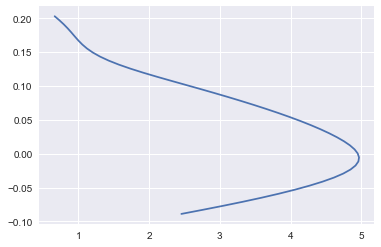

In [90]:
density = scipy.stats.gaussian_kde(errors.reshape((1,len(means))))
xs = np.linspace(errors.min(),errors.max())
plt.plot(density(xs),xs)

#### Variance: Fast, but how Fast?

The sample standard deviation is a statistical quantity which measures the "distance" between the expected value and the average value given a sample size $N$. Its defined as follows:
        \begin{equation}
        S_{N} = \sqrt{ \left( \sum_{i=1}^{N} \frac{X_{i}}{N} - \mathbb{E} [ X ] \right)^2 }
        \end{equation}
Note that $S_{N}$ is a random variable and not a fixed number. Different experiments will yield different results. Since the sample average will eventually converge to the expected value, we expect the "distance" to converge to 0 for sufficiently large sample sizes. Note that
      \begin{equation}
      \begin{split}
      \mathbb{E} [ S_{N}^{2} ] & = \mathbb{E} \left[ \left( \sum_{i=1}^{N} \frac{X_{i}}{N} - \mathbb{E} [ X ] \right)^2 \right] \\
      & = \mathbb{E} \left[ \left( \sum_{i=1}^{N} \frac{ X_{i}}{N} \right)^{2} \right] - 2 \mathbb{E} [ X ] \mathbb{E} \left[ \sum_{i=1}^{N} \frac{X_{i}}{N} \right] + ( \mathbb{E} [ X ] )^{2} \\
      & = \mathbb{E} \left[ \left( \sum_{i=1}^{N} \frac{ X_{i}}{N} \right)^{2} \right]  - \mathbb{E} [ X ]^{2} \\
      & = Var[E] \\
      & = \frac{Var[X]}{N} \\
      \end{split}
      \end{equation}
      
Hence, on average the distance of sample average from the expected value will be around
      $$\sqrt{ \frac{Var[X]}{N} }.$$
This standard deviation may be refer to as the 'speed of convergence'.

Text(0, 0.5, 'std')

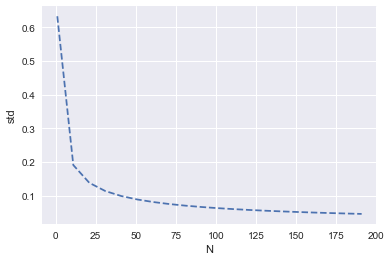

In [316]:
_lambda = 0.4
sample_size = 200
var = _lambda
N = np.arange(1,sample_size,10)
plt.plot(N,np.array([_lambda**0.5/i**0.5 for i in N]),linestyle = '--')
plt.xlabel('N')
plt.ylabel('std')

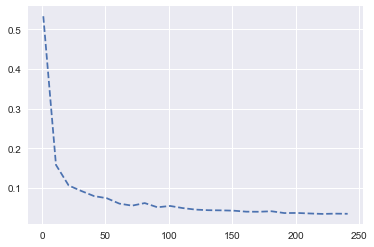

In [317]:
iterations = 10000
N_s = 250
sample_sizes = np.arange(1,N_s,10)

def D(N):
    _samples = poi(_lambda , (N , N_s))
    sample_avg = _samples.mean(axis=0)
    return np.sqrt( ((sample_avg - _lambda)**2)).mean()

results = np.zeros(len(sample_sizes))
for i , size in enumerate(sample_sizes):
    results[i] = D(size)

plt.plot(sample_sizes,results,linestyle = '--')

## Bayes Theorem

The basic idea function behind Bayes idea is UPDATE. Perhaps the brain may not be bayesian but the basic premise underlying the particular formula is similar to the way we update our beliefs of the world when being subjected to new experiences, new data that will alter our initial hypotheses and perhaps replace longlasting prejudices or cognitive biases we had initially - our personal priors. The stronger prior belief in a proposition will require a disproportionate amount of new information disaproving it - let alone reach the point where we completely abandon this idea or hypothesis. Although to effectively due that we need to look at what the data suggest. Let's take a look at the basic premise of bayesian reasoning:
        $$Posterior = Likelihood \times Prior.$$
In order to decipher this equation we first need to define each of these new words.
- Prior = the probability of our hypothesis being true without any data - our initial beliefs or even prejudices
- Posterior = the probability our hypothesis being true under the light of new data
- Likelihood = the probability of observed data have been generated by the particular hypothesis - basically we accept the hypothesis, and ask ourselves "if it's true, what is the probability having observed what we just observed?"

Bayes theorem connects these logical quantities. In more mathematical terms, we may see that if $H$ is our hypothesis we want to test and $D$ the observed data, then Bayes theorem may be written in the following form:
      $$P ( H | D ) = \frac{ P ( D | H ) P ( H ) }{ P ( D ) }.$$
If $\{ H_{1} , \dots , H_{n} \}$ is a set of mutually exclusive hypotheses, partioning the sample spacec, we may write Bayes theorem in the following equivalent form:
       $$P ( H_{j} | D ) = \frac{ P ( D | H_{j} ) P ( H_{j} ) }{ \sum_{i=1}^{n} P ( D | H_{i} ) P ( H_{i} ) }.$$

Let $X$ a random variable with is distributed according to a known probability distribution depending on a particular parameter $a$ which we dont know. Since parameter is unknown we may treat is as a random variable which we want to estimate its range and expected value - Bayesian statistics has no problem with uncertainty. Suppose that we run the experiment $n$ times and observe the following data
$X_{1} = x_{1} , \dots , X_{n} = x_{n}$. How in the light of new data our knowledge about $a$ changes? But wait. We have forgotten something. We surely had some prior beliefs about $a$. Let those beliefs being represented by a distribution $p ( a )$ - our prior. Then we may simply use Bayes theorem to update our initial beliefs about a - our variable of interest. We have
    $$P ( a | X_{1} = x_{1} , \dots , X_{n} = x_{n} ) = \frac{ P ( X_{1} = x_{1} , \dots , X_{n} = x_{n} | a ) P ( a ) }{ \int P ( X_{1} = x_{1} , \dots , X_{n} = x_{n} | a ) P ( a ) d a }$$
Taking a closer look at likelihood, in most cases we will assume that our random variables are statistically independant. Hence, we can write
    \begin{equation}
    \begin{split}
    \log \text{likelihood} & = \log P ( X_{1} = x_{1} , \dots , X_{n} = x_{n} | a ) \\
                           & = \log \prod P ( X_{i} = x_{i} | a ) \\
                           & = \sum_{i} \log P ( X_{i} = x_{i} | a ) \\
                           & = \sum_{i} \log likelihood of X_{i} \\
   \end{split}
   \end{equation}
Since $\log ( \cdot ) $ is a monotonous (increasing) transformation the root of the equation
      $$\frac{ \partial \log \text{likelihood} }{ \partial \text{ parameter} } = 0$$
should yield the maximum likelihood estimator (abbreviated as MLE) of the unknown parameter. The MLE suffers severe drawbacks in certain instances, especially when data are not large enough to justify the estimation. For example, MLE suffers from overfitting the data and does not take into consideration the underlying inherent uncertainty of the real world. Moreover, MLE ignores any data that were observed during the experimentation process. It does not have an UPDATE function, its merely a measure which justifies or fits in the best possible way the parameter to the data, so that the probability of that data being observed under MLE will have the maximum probability. \
Furthermore, note that
     \begin{equation}
     \log \text{posterior} = \log \text{prior} + \log \text{likelihood} - \log \text{chance of observing such data under any hypothesis}
     \end{equation}
Suppose now that we have an unknown parameter $a$ which we want to estimate. We run the experiment $n$ times and observe the values $X_{1} , \dots , X_{n}$. We use the UPDATE function of Bayesian process and we end up with an updated belief about $a$, i.e. $a | X_{1} , \dots , X_{n}$ corresponds to our posterior distribution. Suppose now that we want to perform a point estimate $\hat{a}$ about $a$. Consider the loss function $L ( \hat{a} , a )$ which measures the "distance" between our estimate and the true, but unknown, value of $a$. We wish to evaluate the expected "loss" out of this estimate. There are numerous choices, but due to smoothness conditions, we may end up choosing the natural squared error, i.e.
     $$L ( \hat{a} , a ) = ( \hat{a} - a )^{2}.$$
We will choose the estimator $\hat{a}$ which minimizes the expected squared error $\mathbb{E} [ L ( \hat{a} , a ) | X ]$. Note that still $a$ is a random variable in the Bayesian framework. We have
 \begin{equation}
 \begin{split}
 \mathbb{E} [ L ( \hat{a} , a ) | X ] & = \int L ( \hat{a} , a ) f ( a | X ) d a \\
                & = \int ( \hat{a} - a )^{2} f ( a | X ) d a \\
                & = \hat{a}^{2} - \hat{a} \int a f ( a | X ) d a +  \int a^{2} f ( a | X ) d a \\
                & = \hat{a}^{2} - 2 \hat{a} \mathbb{E} [ a | X ] + \mathbb{E} [ a^{2} | X ] \\
                & = \hat{a}^{2} - 2 \hat{a} \mathbb{E} [ a | X ] + \left( \mathbb{E} [ a | X ] \right)^{2} + \mathbb{Var} [ a | X ] \\
                & = \left( \hat{a} - \mathbb{E} [ a | X ] \right)^{2} + \mathbb{Var} [ a | X ] \\
                & \geq \mathbb{Var} [ a | X ] \\
 \end{split}
 \end{equation}
 with equality if and only if $\hat{a} = \mathbb{E} [ a | X ]$. Hence, the squared loss error is *minimized* when $a_{BE} = \mathbb{E} [ a | X ]$ and the expected minimum loss is equal to the variance of the posterior distribution of $a$ - a result which is very intuitive! \
 Another logical - not so smooth choice - for the loss function is by the expected absolute error, i.e. $L ( \hat{a} , a ) = \vert \hat{a} - a \vert$. Thus,
 \begin{equation}
 \begin{split}
 \mathbb{E} [ L ( \hat{a} , a ) | X ] & = \int L ( \hat{a} , a ) f ( a | X ) d a \\
                       & = \int \vert \hat{a} - a \vert f ( a | X ) d a \\
                       & = \int_{\hat{a}}^{\infty} ( a - \hat{a} ) f ( a | X ) d a + \int_{-\infty}^{\hat{a}} ( \hat{a} - a ) f ( a | X ) d a \\
                       & = \int_{\hat{a}}^{\infty} a f ( a | X ) - \hat{a} \int_{\hat{a}}^{\infty} f ( a | X ) d a + \hat{a} \int_{-\infty}^{\hat{a}} f ( a | X ) d a - \int_{-\infty}^{\hat{a}} a f ( a | X ) d a \\
\end{split}
\end{equation}
By differentiating we easily see that
\begin{equation}
\begin{split}
\frac{ d \mathbb{E} [ L ( \hat{a} , a ) | X ] }{ d a } & = - \hat{a} f ( \hat{a} | X ) - \int_{\hat{a}}^{\infty} f ( a | X ) d a +  \hat{a} f ( \hat{a} | X ) \\
           & + \int_{-\infty}^{\hat{a}} f ( a | X ) d a + \hat{a} f ( \hat{a} | X ) - \hat{a} f ( \hat{a} | X ) \\
           & = - \int_{\hat{a}}^{\infty} f ( a | X ) d a + \int_{-\infty}^{\hat{a}} f ( a | X ) d a \\
\end{split}
\end{equation}
and
\begin{equation}
\begin{split}
  & \frac{ d \mathbb{E} [ L ( \hat{a} , a ) | X ] }{ d a } = 0 \\
  \implies & \int_{\hat{a}}^{\infty} f ( a | X ) d a = \int_{-\infty}^{\hat{a}} f ( a | X ) d a \\
  \implies & P ( a \geq \hat{a} | X ) = P ( a \leq \hat{a} | X ) \\
  \implies & P ( a \geq \hat{a} | X ) = 0.5 \\
  \implies & \hat{a} = \text{ median } ( a ). \\
\end{split}
\end{equation}
Moreover,
\begin{equation}
\begin{split}
\frac{ d^{2} \mathbb{E} [ L ( \hat{a} , a ) | X ] }{ d a^{2} } & = f ( \hat{a} | X ) + f ( \hat{a} | X ) = 2 f ( \hat{a} | X ) > 0 , \ \text{ for any a }.
\end{split}
\end{equation}
Thus, $d^{2} \mathbb{E} [ L ( \hat{a} = \text{ median } ( a ) , a ) ] / d a^{2} > 0$ and $\hat{a} = \text{ median } ( a )$ is indeed a minimum. Finally, the minimum expected loss is being given by
\begin{equation}
\begin{split}
\mathbb{E} [ L ( \hat{a} , a ) | X ] & = \int_{\hat{a}}^{\infty} a f ( a | X ) - \hat{a} \int_{\hat{a}}^{\infty} f ( a | X ) d a + \hat{a} \int_{-\infty}^{\hat{a}} f ( a | X ) d a - \int_{-\infty}^{\hat{a}} a f ( a | X ) d a \\
& =  \int_{\hat{a}}^{\infty} a f ( a | X ) - \int_{-\infty}^{\hat{a}} a f ( a | X ) d a \\
\end{split}
\end{equation}

More generally, suppose that $\theta = ( \theta_{1} , \dots , \theta_{n} )$ is a random vector of parameters we want to estimate and $\hat{\theta} = ( \hat{\theta_{1}} , \dots , \hat{\theta_{n}} )$ is our estimator for each of these parameters such that $\hat{\theta_{i}}$ estimates $\theta_{i}$ for each $i$. We will consider the normed squared error $\Vert \cdot \Vert_{2}^{2}$. Note that
      \begin{equation}
      \begin{split}
      \mathbb{E} [ \mathcal{L} ( \theta , \hat{\theta} ) ] & = \int \Vert \theta - \hat{\theta} \Vert_{2}^{2} f ( \theta_{1} , \dots , \theta_{n} ) d \theta_{1} \dots d \theta_{n} \\
                              & = \int \Vert \theta \Vert_{2}^{2} f ( \theta_{1} , \dots , \theta_{n} ) d \theta_{1} \dots d \theta_{n} - 2 \int ( \theta , \hat{\theta} ) f ( \theta_{1} , \dots , \theta_{n} ) d \theta_{1} \dots d \theta_{n} + \Vert \hat{\theta} \Vert_{2}^{2}  \\
                              & = \mathbb{E} [ \Vert \theta \Vert_{2}^{2} ] - 2 \sum_{i=1}^{n} \hat{ \theta }_{i} \int \theta_{i} f ( \theta_{1} , \dots , \theta_{n} ) d \theta_{1} \dots d \theta_{n}  +  \Vert \hat{\theta} \Vert_{2}^{2} \\
                              & = \sum_{i} \mathbb{E} [ \theta_{i}^{2} ] - 2 \sum_{i=1}^{n} \hat{ \theta }_{i} \int \theta_{i} f ( \theta_{1} , \dots , \theta_{n} ) d \theta_{1} \dots d \theta_{n}  +  \Vert \hat{\theta} \Vert_{2}^{2} \\
                              & = \sum_{i} \left( \mathbb{E} [ \theta_{i} ] \right)^{2} - 2 \sum_{i=1}^{n} \hat{ \theta }_{i} \mathbb{E} [ \theta_{i} ] + \Vert \hat{\theta} \Vert_{2}^{2} + \sum_{i} \mathbb{Var} [ \theta_{i} ] \\
                                & = \Vert \mathbb{E} [ \theta ] \Vert_{2}^{2} - 2 \left( \hat{\theta} , \mathbb{E} [ \theta ] \right) + \Vert \hat{ \theta } \Vert_{2}^{2} + \mathbb{Var} \left[ \sum_{i} \theta_{i} \right] \\
                              & = \Vert \mathbb{E} [ \Vert \theta \Vert_{2} ] - \hat{\theta} \Vert_{2}^{2} + \mathbb{Var} [ \Vert \theta \Vert_{1} ] \\
                              & \geq \mathbb{Var} [ \Vert \theta \Vert_{1} ] \\
      \end{split}
      \end{equation}

### Credible Intervals

After having updated our beliefs and calculated our estimators, a proper bayesian analysis is not quite done yet. We have one final piece missing. We need around our estimators to calculate the credible intervals (CI). A $a$ - credible interval is ... an interval which our estimator has probability $a$ of actually lying within that interval. Mathematically, we can define
        $$C_{a , k} = \{ \theta : f ( \theta | x ) \geq k \}$$
where
      $$k := \min \left\{ k \in \mathbb{N}: \int_{ C_{ a , k }} 
      f ( \theta | x ) d \theta = 1 - \alpha \right\}.$$

### Bayesian Analysis of basic probability distributions 
#### Gamma Distribution

\begin{equation}
f ( x ; a , b ) = \frac{ x^{a-1} e^{-b x } b^{a} }{ \Gamma ( a ) } , \ x > 0 ; a , b > 0
\end{equation}

\begin{equation}
\begin{split}
\mathbb{E} [ X^{k} ] & = \int_{0}^{\infty} x^{k} \frac{ x^{a-1} e^{-b x} b^{a} }{ \Gamma ( a ) } d x \\
                     & = \int_{0}^{\infty} \frac{ x^{a + k - 1 } e^{ - b x } b^{a} }{ \Gamma( a ) } d x \\
                                          & \overset{ b x = u }{ = } \frac{ b^{a} }{ \Gamma( a ) b^{ a + k - 1 } } \int_{0}^{\infty} u^{ a + k - 1 } e^{ - u } \frac{ du }{ b } \\
                     & = \frac{ \Gamma( a + k ) }{ \Gamma( a ) b^{ k } } \\
                     & = \frac{ a ( a + 1 ) \dots ( a + k - 1 ) }{ b^{ k } } \\
\end{split}
\end{equation}
Thus,
$$\mathbb{E} [ X ] = \frac{a}{b}$$
and
$$\mathbb{Var} [ X ] = \mathbb{E} [ X^{2} ] - \left( \mathbb{E} [ X ] \right)^{2} = \frac{ a ( a + 1 )  - a^{2} }{ b^{2} } = \frac{a}{b^{2}}.$$

No handles with labels found to put in legend.
No handles with labels found to put in legend.


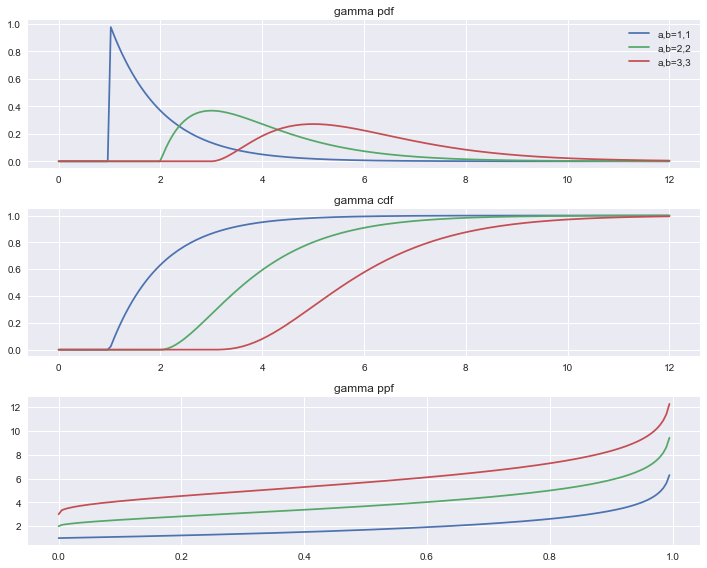

In [118]:
fig , (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(10,8))
x = np.linspace(0,12,200)
q = np.linspace(0,1,200)
for a , b in zip([1,2,3],[1,2,3]):
    z = scipy.stats.gamma.pdf(x,a,b)
    w = scipy.stats.gamma.cdf(x,a,b)
    u = scipy.stats.gamma.ppf(q,a,b)
    ax1.plot(x,z,label=f'a,b={a},{b}')
    ax2.plot(x,w)
    ax3.plot(q,u)
ax1.set_title('gamma pdf')
ax2.set_title('gamma cdf')
ax3.set_title('gamma ppf')
ax1.legend(loc=0) , ax2.legend(loc=0) , ax3.legend(loc=0)
fig.tight_layout()

#### Normal Distribution

\begin{equation}
f ( x ; \mu , \sigma ) = \frac{1}{ \sigma \sqrt{ 2 \pi } } e^{ - \frac{ \left( x - \mu \right)^{2} }{ 2 \sigma^{2} } }
\end{equation}

Suppose that we perform $n$ measurements and we obtain the results $X_{1} , \dots , X_{n}$. The likelihood is then given by
\begin{equation}
\begin{split}
L ( X_{1} , \dots , X_{n} | \mu , \sigma ) & = \sum_{i=1}^{n} \log f ( X_{i} | \mu , \sigma ) \\
                & = - \sum_{i=1}^{n} \frac{ \left( x_{i} - \mu \right)^{2} }{ 2 \sigma^{2} } - n \log \sigma - \frac{n}{2} \log 2 \pi \\
\end{split}
\end{equation}

Note that
\begin{equation}
\begin{split}
\frac{ \partial L }{ \partial \mu } & = \sigma^{-2} \sum_{i=1}^{n} ( x_{i} - \mu ) \\
\frac{ \partial L }{ \partial \sigma } & = - \frac{n}{\sigma} + \sigma^{-3} \sum_{i=1}^{n} ( x_{i} - \mu )^{2}
\end{split}
\end{equation}

Thus,
\begin{equation}
\begin{split}
\frac{ \partial L }{ \partial \mu } & = 0 \implies \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_{i}
                               \implies \hat{\mu} = \overline{X_{n}} \\
\frac{ \partial L }{ \partial \sigma } & = 0
                    \implies \hat{\sigma} = \frac{ 1 }{ n } \sum_{i=1}^{n} ( x_{i} - \mu )^{2}
                    \implies \hat{\sigma} = S_{n}^{2} \\
\end{split}
\end{equation}

No handles with labels found to put in legend.
No handles with labels found to put in legend.


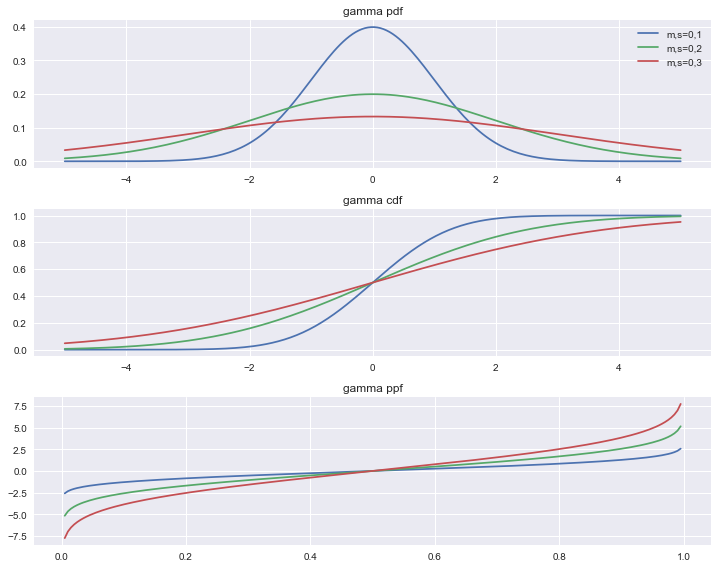

In [123]:
fig , (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(10,8))
x = np.linspace(-5,5,200)
q = np.linspace(0,1,200)
for m , s in zip([0,0,0],[1,2,3]):
    z = scipy.stats.norm.pdf(x,m,s)
    w = scipy.stats.norm.cdf(x,m,s)
    u = scipy.stats.norm.ppf(q,m,s)
    ax1.plot(x,z,label=f'm,s={m},{s}')
    ax2.plot(x,w)
    ax3.plot(q,u)
ax1.set_title('gamma pdf')
ax2.set_title('gamma cdf')
ax3.set_title('gamma ppf')
ax1.legend(loc=0) , ax2.legend(loc=0) , ax3.legend(loc=0)
fig.tight_layout()

We want to calculate the probability of $X$ being within $n$ standard deviations $\sigma$ from the mean, i.e. to evaluate the probability
         $$P \left( \mu - n \sigma \leq X \leq \mu + n \sigma \right).$$
We can equivalently, rewrite the above expression as follows:
        $$P \left( - n \leq \frac{ X - \mu }{ \sigma } \leq n \right) = P ( - n \leq Z \leq n ),$$
where 
              $$Z = \frac{X - \mu}{\sigma} \sim \mathcal{N} ( 0 , 1 ),$$
is the normalized gaussian variable.
         
\begin{equation}
\begin{split}
P \left( \mu - n \sigma \leq X \leq \mu + n \sigma \right) & = P \left( - n \leq Z \leq n \right) \\
                                                     & = P ( Z \leq n ) - P ( Z \leq - n ) \\
                                                     & = \Phi ( n ) - \Phi ( - n ). \\
\end{split}
\end{equation}

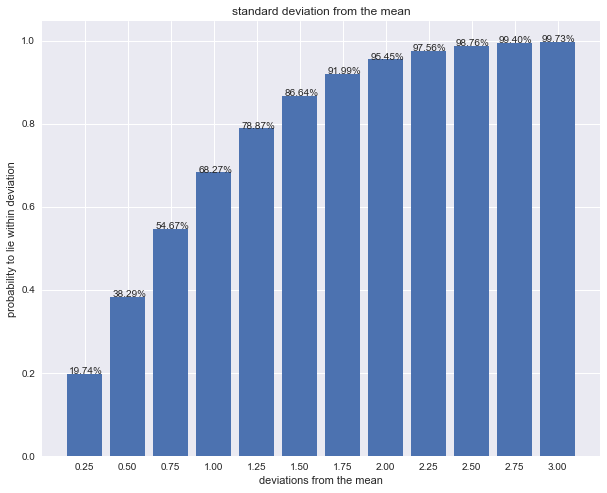

In [150]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
n = np.arange(0.25,3.25,0.25)
x = lambda n: scipy.stats.norm.cdf(n,0,1)
deviation = x(n) - x(-n)
ax.bar(n,deviation,width=0.2)
for i , patch in enumerate(ax.patches):
    ax.text(patch.get_x()+patch.get_width()/20,deviation[i],'{:1.2f}%'.format(deviation[i]*100),size='10')
plt.title('standard deviation from the mean')
ax.set_xlabel('deviations from the mean')
ax.set_ylabel('probability to lie within deviation')
ax.set_xticks(n)

A $z$ equal tailed critical value is defined as:
     $$P ( - z_{a/2} < Z < z_{a/2} ) = 1 - a.$$
Note that
\begin{equation}
\begin{split}
1 - a & = P ( - z_{a/2} < Z < z_{a/2} ) \\
      & = 1 - 2 P ( Z < - z_{a/2} ) \\
      & = 1 - 2 \Phi ( - z_{a/2} ). \\
      \implies & \Phi ( - z_{a/2} ) = \frac{a}{2} \\
      \implies & z_{a/2} = - \Phi^{-1} \left( \frac{a}{2} \right). \\
\end{split}
\end{equation}
Let's calculate this value with Python.

95% interval:  1.9599639845400545


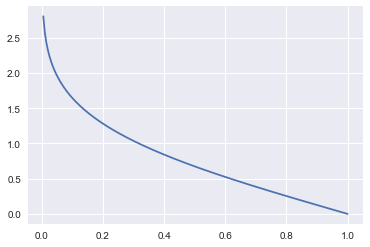

In [154]:
a = np.linspace(0,1,200)
z = - scipy.stats.norm.ppf(a/2,0,1)
print('95% interval: ',-scipy.stats.norm.ppf(0.05/2,0,1))
plt.plot(a,z)

#### Beta Distribution
\begin{equation}
f ( x ; a , b ) = \frac{ x^{a-1} (1-x)^{b-1}}{B(a,b)} , \ 0 < x < 1 ; a , b > 0
\end{equation}

\begin{equation}
B ( a , b ) = \frac{ \Gamma ( a ) \Gamma ( b ) }{ \Gamma ( a + b ) }
\end{equation}

Note that
\begin{equation}
\begin{split}
B ( a + k , b ) & = \frac{ \Gamma ( a + k ) \Gamma ( b ) }{ \Gamma ( a + k + b ) } \\
                & = \frac{ a \dots ( a + k - 1 ) \Gamma ( a ) \Gamma ( b ) }{ ( a + b ) \dots ( a + b + k - 1 ) \Gamma ( a + b ) } \\
                & = \frac{ a \dots ( a + k - 1 ) }{ ( a + b ) \dots ( a + b + k - 1 ) } B ( a , b ). \\
\end{split}
\end{equation}


\begin{equation}
\begin{split}
\mathbb{E} [ X^{k} ] & = \int_{0}^{1} x^{k} \frac{ x^{a-1} ( 1 - x )^{b-1} }{ B ( a , b ) } d x \\
                     & = \int_{0}^{1} x^{a+k-1} ( 1 - x )^{b-1} d x \\
                     & = \frac{ B ( a + k , b ) }{ B ( a , b ) } \\
                     & = \frac{ a \dots ( a + k - 1 ) }{ ( a + b ) \dots ( a + b + k - 1 ) }. \\
\end{split}
\end{equation}

In particular,
\begin{equation}
\begin{split}
\mathbb{E} [ X ] & = \frac{ a }{ a + b } \\
\mathbb{Var} [ X ] & = \mathbb{E} [ X^{2} ] - \left( \mathbb[E] [ X ] \right)^{2} \\
                   & = \frac{ a ( a + 1 ) }{ ( a + b ) ( a + b + 1 ) } - \frac{ a^{2} }{ (a+b)^{2} } \\
\end{split}
\end{equation}

Mode
\begin{equation}
\begin{split}
\frac{ d f_{ X } }{ d x } & = \frac{1}{B(a,b)} ( a - 1 ) x^{ a - 2 } ( 1 - x )^{ b - 1 } - ( b - 1 ) x^{ a - 1 } ( 1 - x )^{ b - 2 } \\
               & = \frac{1}{B(a,b)} x^{ a - 2 } ( 1 - x )^{ b - 2 } \left( ( a - 1 ) ( 1 - x ) - ( b - 1 ) x \right) \\
\end{split}
\end{equation}

and

\begin{equation}
\begin{split}
 & \frac{ d f_{ X } }{ d x } = 0 \\
\implies & ( a - 1 ) ( 1 - x ) - ( b - 1 ) x = 0 \\
\implies & \frac{1-x}{x} = \frac{ b - 1 }{ a - 1 } \\
\implies & \frac{1}{x} = 1 + \frac{ b - 1 }{ a - 1 } \\
\implies & \frac{1}{x} = \frac{ a + b - 2 }{ a - 1 } \\
\implies & x = \frac{ a - 1 }{ a + b - 2 } \\
\end{split}
\end{equation}

No handles with labels found to put in legend.
No handles with labels found to put in legend.


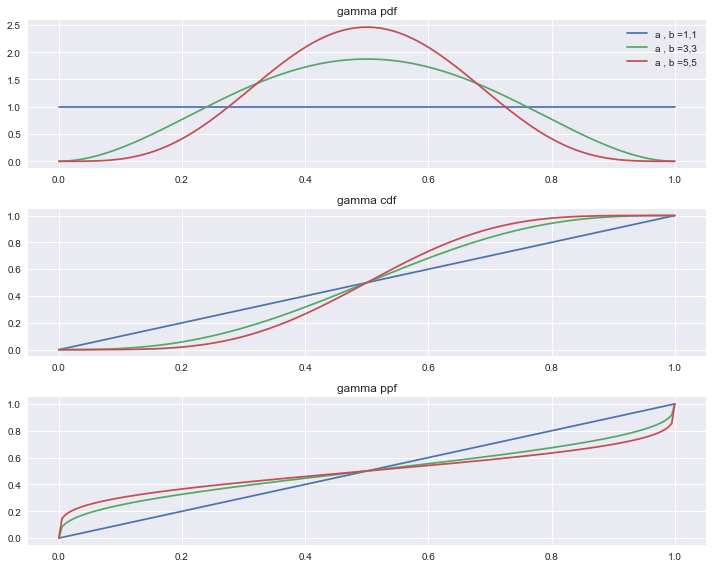

In [125]:
fig , (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(10,8))
x = np.linspace(0.0001,0.9999,200)
q = np.linspace(0,1,200)
for a , b in zip([1,3,5],[1,3,5]):
    z = scipy.stats.beta.pdf(x,a,b)
    w = scipy.stats.beta.cdf(x,a,b)
    u = scipy.stats.beta.ppf(q,a,b)
    ax1.plot(x,z,label=f'a , b ={a},{b}')
    ax2.plot(x,w)
    ax3.plot(q,u)
ax1.set_title('gamma pdf')
ax2.set_title('gamma cdf')
ax3.set_title('gamma ppf')
ax1.legend(loc=0) , ax2.legend(loc=0) , ax3.legend(loc=0)
fig.tight_layout()

#### Coin Flipping Experiment

Suppose that we are told to estimate the probability $\theta$ of a particular coin landing heads. Since we dont know anything about this coin, we may suppose that $\theta \sim \Gamma ( a , b )$. Suppose that we perform this experiment $n$ times and we obtain $m \leq n$ heads. How our beliefs will be updated subject to the new data? \
Note that the likelihood of such is result is equal to
     \begin{equation}
     \begin{split}
     \log L ( X_{1} , \dots , X_{n} | \theta ) & = \log \theta^{ \sum_{i} x_{i} } (1-\theta)^{ n - \sum_{i} x_{i} } \\
              & = \sum_{i} x_{i} \log \theta + \left( n - \sum_{i} x_{i} \right) \log ( 1 - \theta ) \\
     \end{split}
     \end{equation}
Thus,
     \begin{equation}
     \begin{split}
     & \frac{ d L }{ d \theta } = \frac{1}{\theta} \sum_{i} x_{i} - \frac{1}{1-\theta} \left( n - \sum_{i} x_{i} \right) = 0 \\
     \implies & ( 1 - \theta ) \sum_{i} x_{i} = \theta \left( n - \sum_{i} x_{i} \right) \\
     \implies & \theta^{-1} - 1 = \frac{n}{\sum_{i} x_{i}} - 1 \\
     \implies & \theta = \frac{\sum_{i} x_{i}}{n} \\
     \implies & \theta_{MLE} = \overline{X_{n}}. \\
     \end{split}
     \end{equation}
The MLE is equal to the sample mean.

Note that
\begin{equation}
\begin{split}
P ( \theta | X_{1} = x_{1} , \dots , X_{n} = x_{n} ) & = \frac{ P ( X_{1} = x_{1} , \dots , X_{n} = x_{n} | \theta ) P ( \theta ) }{ \int P ( X_{1} = x_{1} , \dots , X_{n} = x_{n} | \theta ) P ( \theta ) d \theta } \\
      & = \frac{ \theta^{ \sum_{i} x_{i} } ( 1 - \theta )^{ n - \sum_{i} x_{i} } \theta^{a-1} (1 - \theta)^{b-1} B ( a , b ) }{ B ( a , b ) \int \theta^{ \sum_{i} x_{i} } (1-\theta)^{ n - \sum_{i} x_{i} } \theta^{a-1} (1-\theta)^{b-1} d \theta } \\
      & = \frac{ \theta^{ a - 1 + \sum_{i} x_{i} } ( 1 - \theta )^{ n + b - 1 - \sum_{i} x_{i} } }{  \int \theta^{ a - 1 + \sum_{i} x_{i} } ( 1 - \theta )^{ n + b - 1 - \sum_{i} x_{i} } d \theta } \\
      & = \frac{ \theta^{ a - 1 + \sum_{i} x_{i} } ( 1 - \theta )^{ n + b - 1 - \sum_{i} x_{i} } }{ B \left( a + \sum_{i} x_{i} , n + b - \sum_{i} x_{i} \right) } \\
      \implies \theta | X_{1} = x_{1} , \dots , X_{n} = x_{n} &  =~  B \left( a + \sum_{i} x_{i} , n + b - \sum_{i} x_{i} \right). \\
\end{split}
\end{equation}

The minimum squared loss error is attained on the estimator:
         $$\theta_{BE} = \frac{ a + \sum_{i} x_{i} }{ n + a + b }.$$
MAP is given by:
        $$\theta_{MAP} = \frac{ a + \sum_{i} x_{i} - 1 }{ a + n + b - 2 }.$$ 

Moreover, the minimum expected square loss is given by the variance:
         $$\mathbb{Var} [ \theta | X ] = .$$

Suppose now that we are asked to play a game. We have made our observations, and now posterior is our current belief about the state of parameter $\theta$. In this game with probability $\theta$ we win 1 round. If we play $n$ games, what is the expected rounds that we will win? 
Let $X$ the total winning rounds. Since this is a binomial experiment, the expected value is given by
           $$\mathbb{E} [ X | \theta ] = n \theta.$$
That means, *IF* we know $\theta$, then $X$ is expected to be around $n \theta$. More general, suppose that $X$ and $Y$ are two random variables. We can define the expected value of $X$ given $Y = y$ as follows:
       $$\mathbb{E} [ X | Y = y ] = \int_{x} x f_{X} ( x | Y = y ) d x.$$
Hence,
      \begin{equation}
      \begin{split}
      \mathbb{E} [ X ] & = \int_{x} x f_{X} ( x ) d x \\
                       & = \int_{x} \int_{ y } x P ( X = x | Y = y ) P ( Y = y ) d y d x \\
                       & = \int_{y} P ( Y = y ) \int_{x} x P ( X = x | Y = y ) d x d y
                       & = \int_{y} \mathbb{E} [ X | Y = y ] f_{Y} ( y ) d y. \\
      \end{split}
      \end{equation}
Note that $\mathbb{E} [ X | Y ]$ is a random variable, as in case of $\theta$ - the unknown probability of landing heads - and not a fixed quantity since its dependant on the random variable $Y$. Hence, we may write $Z ( Y ) = \mathbb{E} [ X | Y ]$ and now we can easily see that
      \begin{equation}
      \begin{split}
      \mathbb{E} [ \mathbb{E} [ X | Y ] ] & = \int_{y} Z ( y ) f_{Y} ( y ) d y \\
                           & = \int_{y} \mathbb{E} [ X | Y = y ] f_{Y} ( y ) d x. \\
      \end{split}
      \end{equation}
Thus, by combining the equations above, we just proved the renowned **tower theorem**:
        $$\mathbb{E} [ X ] = \mathbb{E} [ \mathbb{E} [ X | Y ] ].$$

Now we can apply tower theorem to solve our original problem. By the tower theorem we have:
          \begin{equation}
          \begin{split}
          \mathbb{E} [ X ] & = \mathbb{E} [ \mathbb{E} [ X | \theta ] ] \\
                           & = \mathbb{E} [ n \theta ] \\
                           & = n \mathbb{E} [ \theta ] \\
                           & = n \theta_{BE} \\
                           & = n \frac{ a + \sum_{i} x_{i} }{ n + a + b }. \\
         \end{split}
         \end{equation}
After the game, by acquiring more data our posterior will change again, this time the old posterior will be our prior and the new posterior will be a new, updated belief about the state of $\theta$.

(0.0, 1.0)

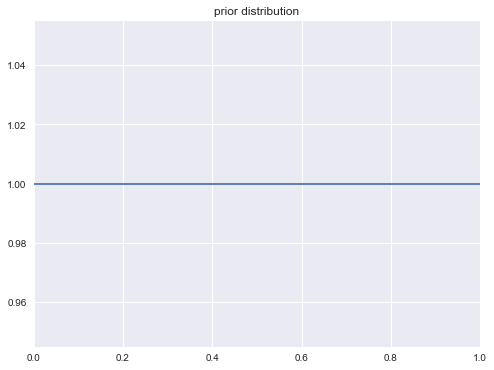

In [93]:
plt.figure(figsize=(8,6))

def bayes_estimator(a,b,data):
    return (a+sum(data))/(len(data)+a+b)

def MLE(data):
    return sum(data)/len(data)

p = np.linspace(1e-3,0.999)
a , b = 1 , 1
beta = lambda x , a , b : scipy.stats.beta.pdf(x,a,b)
z = beta(p,a,b)
plt.plot(p,z)
plt.title('prior distribution')
plt.xlim(0,1)

In [358]:
###generating coin flips
par = 0.4
data = np.arange(1,10,1)
size = 10
data = np.random.random(size)<=par
data = list(data)
data

[True, False, False, False, True, False, False, False, True, False]

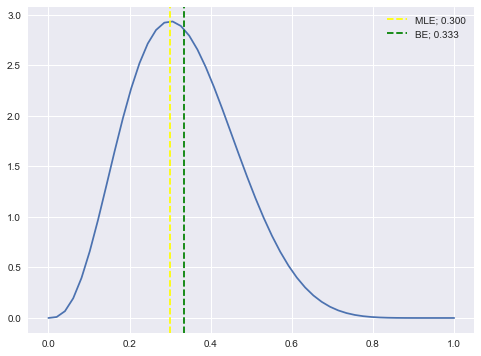

In [359]:
###Plotting posterior distribution
plt.figure(figsize=(8,6))
p = np.linspace(1e-5,0.9999)
A  = a + sum(data)
B = len(data) + b - sum(data)
posterior = beta(p,A,B)
plt.plot(p,posterior)
mle = MLE(data)
plt.axvline(x= mle, ymin=0.0, ymax=posterior.max(),
            color='yellow',linestyle='--',label ='MLE; {:1.3f}'.format(mle))
be = bayes_estimator(a,b,data)
plt.axvline(x= be , ymin = 0.0, ymax=posterior.max(),
            color='green',linestyle='--',label ='BE; {:1.3f}'.format(be))
plt.xlim()
plt.legend(loc=0)

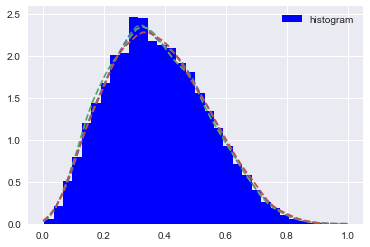

In [321]:
betadistr = np.random.beta
for i in range(3):
    samples = betadistr(A,B,size=10000)
    density = scipy.stats.gaussian_kde(samples)
    if i==0:
        plt.hist(samples,bins=30,density=True,color='blue',label='histogram')
    plt.plot(p,density(p),linestyle='--')
plt.legend(loc=0)

In [322]:
#######1e4 visits and 100 encounters
samples = betadistr(A,B,size=10000)
data = None
for sample in samples:
    tosses = np.random.random(100)<=sample
    if data is None:
        data = tosses
    else:
        data = np.vstack([data,tosses])
data = data.astype('int64')
data

array([[1, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

[1 1 0 ... 0 0 0]


<BarContainer object of 2 artists>

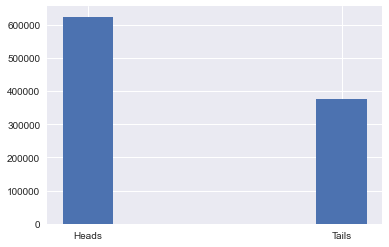

In [323]:
_ , inv , counts = np.unique(data, return_inverse=True, return_counts=True)
print(inv)
plt.bar(['Heads','Tails'],counts,width=0.2)

Let's calculate a credible interval for the coin flip experiment parameter $\theta$. We saw that
        $$\theta \sim B \left( a + \sum_{i} x_{i} , n + b - \sum_{i} x_{i} \right).$$
For simplicity, let's suppose that our posterior is $B ( 1 , 1 )$. Now note, that
     $$f ( \theta ) = 1.$$
Hence, a $(1-a) \% 100$ highest density equal-tailed credible interval with $a = 5 \%$ is given by
        $$C = [0.025,0.975].$$
That is, $P ( \theta \in C ) = 95\%$.

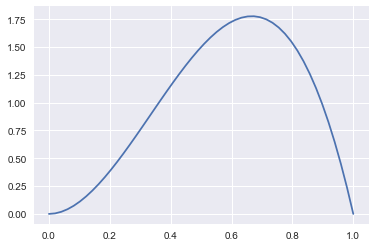

In [70]:
x = np.linspace(0,1)
y = scipy.stats.beta.pdf(x,3,2)
z = np.linspace(y.min(),y.max())
plt.plot(x,y)

In [96]:
true_value = 0.3456

def loss(a,b):
    return (a-b)**2

def sim():
    true_value = 0.3456
    losses = []
    for _ in range(10000):
        data = np.random.random(4)<=true_value
        be = bayes_estimator(1,1,data)
        losses.append(loss(be,true_value))
        
        


##### Geometric Distribution
Suppose that we consecutively flip a coin until it lands heads. If the coin has probability $\theta$ of landing heads then let $X$ represent the total number of throws until the first success, the number of tails we saw before landing heads for the first time. Then, the probability distribution of $X$ is the geometric distribution given by:
        $$f_{X} ( x ) = \theta ( 1 - \theta )^{ x - 1 } , \ x = 1 , 2 , \dots.$$
The derivation is fairly straightforward. All the valid binary sequences upon which the experiment ends end with 1 while the rest of the sequence is 0. Thus, if the sequence has length $x$, then we need $x-1$ failures and 1 success, and due to the statistical independence of tosses, we obtain:
       $$\theta ( 1 - \theta )^{ x - 1 }$$
probability for that particular sequence arising. Note that

\begin{equation}
\begin{split}
\mathbb{E} [ X^{k} ] & = \sum_{ x = 0 }^{ \infty } f_{X} ( x ) x^{k} \\
                     & = \sum_{ x = 0 }^{ \infty } \theta ( 1 - \theta )^{ x - 1 } x^{ k } \\
\end{split}
\end{equation}

Geometric distribution does not only model coin flips or time until first success situations. With slight modifications it can also model daily incoming orders with "first success" being regarded as a "stopping point" or a ceiling to the size of the order. If we want to add a minimum number of orders, we could use the following form of the geometric model:
      $$f_{ X } ( x ) = \theta ( 1 - \theta )^{ x - k } , \ x = k , k + 1 , \dots.$$
Note that,
     \begin{equation}
     \begin{split}
     \sum_{ x = k }^{ \infty } f_{X} ( x ; \theta ) & = \sum_{ x = k }^{ \infty } \theta ( 1 - \theta )^{ x - k } \\
                                                    & = \theta \sum_{ x = 0 }^{ \infty } ( 1 - \theta )^{ x } \\
                                                     & = \theta \frac{ 1 }{ 1 - ( 1 - \theta ) } \\
                                                     & = 1. \\
     \end{split}
     \end{equation}
Hence, our model is a valid probability distribution. Moreover, note that

\begin{equation}
\begin{split}
\frac{ d f_{ X } ( x ; \theta ) }{ d \theta } & = ( 1 - \theta )^{ x - k } - \theta ( x - k ) ( 1 - \theta )^{ x - k - 1 } \\
      & \frac{ d f_{ X } ( x ; \theta ) }{ d \theta } = 0 \\
      \implies & \frac{1}{ x - k } = \frac{ \theta }{ 1 - \theta } \\
      \implies & x = \frac{1}{\theta} + k - 1. \\
      \end{split}
      \end{equation}

Suppose that we observe the daily orders of the local grocery shop. We check each day the number of apples sold. We are presented the last $n$ days with the total apple sales for each day. These data can be represented as a random vector $X_{1} = x_{1} , \dots , X_{n} = x_{n}$. We assume that the total apples sold each day is a geometric random variable $X$. We want to estimate $\theta$. How our beliefs are shaped when subjected to the new data? Before we use UPDATE we assume that $\theta \sim B ( a , b )$ is our prior. First we will compute the maximum likelihood estimator. Note that

\begin{equation}
\begin{split}
L ( X_{1} , \dots , X_{n} | \theta ) & = \sum_{i=1}^{n} \log f ( X_{i} | \theta ) \\
                                     & = \sum_{i=1}^{n} \log \theta ( 1 - \theta )^{ x_{i} - k } \\
                                     & = n \log \theta + \log ( 1 - \theta ) \left( - k n + \sum_{i=1}^{n} x_{i} \right). \\
\end{split}
\end{equation}

Thus,
         \begin{equation}
         \begin{split}
         \frac{ d L }{ d \theta } & = \frac{n}{\theta} - \frac{1}{1-\theta} \left( - k n + \sum_{i=1}^{n} x_{i} \right) \\
                            \implies & \frac{ d L }{ d \theta } = 0   \\
                            \implies & \frac{ 1 - \theta }{ \theta } = - k + \frac{1}{n} \sum_{i=1}^{n} x_{i} \\
                            \implies & \frac{1}{ \theta } = - k + 1 + \overline{X_{n}} \\
                            \implies & \theta_{MLE}  = \frac{1}{1 - k + \overline{X_{n}} }. \\
         \end{split}
         \end{equation}

The posterior is given by:
\begin{equation}
\begin{split}
P ( \theta | X_{1} = x_{1} , \dots , X_{n} = x_{n} ) & = \frac{ P ( X_{1} = x_{1} , \dots , X_{n} = x_{n} | \theta ) P ( \theta ) }{ \int_{0}^{1} P ( X_{1} = x_{1} , \dots , X_{n} = x_{n} | \theta ) P ( \theta ) d \theta } \\
          & = \frac{ \theta^{n} \prod_{i=1}^{n} ( 1 - \theta )^{ x_{i} - k } \theta^{a-1} ( 1 - \theta )^{ b - 1 } }{ \int_{0}^{1} \theta^{n} \prod_{i=1}^{n} ( 1 - \theta )^{ x_{i} - k } \theta^{ a - 1 } ( 1 - \theta )^{ b - 1 } d \theta } \\
          & = \frac{ \theta^{ n + a - 1 } ( 1 - \theta )^{ \sum_{i=1}^{n} x_{i} - k n + b - 1 } }{ \int_{0}^{1} \theta^{n + a - 1 } ( 1 - \theta )^{ \sum_{ i = 1 }^{ n } x_{ i } - k n + b - 1 } d \theta } \\
\end{split}
\end{equation}

Thus,
     $$\theta | X_{1} = x_{1} , \dots , X_{n} = x_{n} \sim B \left( n + a , \sum_{i=1}^{n} x_{i} - k n + b \right).$$

The Bayes estimator is given by:
     $$\theta_{BE} = \frac{ n + a }{ n + a + \sum_{i=1}^{n} x_{i} - k n + b }.$$
     
MAP is given by:
     $$\theta_{MAP} = \frac{ n + a - 1 }{ n + a + \sum_{i=1}^{n} x_{i} - k n + b - 2 }.$$

#### Multinomial Distribution

Suppose that there are $m$ types of coupons inside a box. We assume that the population for each type of coupon is sufficiently high to justify a constant probability along consecutive draws. Moreover, we assume that all the draws are independent. Let $\theta_{i}$ the probability of drawing a coupon of type $i$. We must have $\sum_{i} \theta_{i} = 1$. Imagine that we draw $N$ coupons in row. Let $X_{i}$ denote the total number of coupons we draw in those $N$ selections. We want to evaluate the probability 
     $$P ( X_{1} = x_{1} , \dots , X_{m} = x_{m} ),$$
such that $\sum_{i} x_{i} = N$. We want to construct the sequence $z_{1} \dots z_{N}$ so that we have exactly $x_{i}$ of type $i$ coupons. We will see the problem from a different angle. Imagine that we assign to each of the $N$ seats one coupon type. For instance, we may assign to all seats the same coupon type $j$ and in that case we will have $X_{i} = N$ if $i = j$ else 0. We can assign $x_{1}$ out of $N$ seats the coupon of type 1. This can be done with $\binom{N}{x_{1}}$ ways. We assign to the remaining $N - x_{1}$ seats $x_{2}$ coupons of type 2. This can be done with $\binom{N-x_{1}}{x_{2}}$ ways. We continue like this until all seats "are taken". By the multiplication principle, the total number of ways we can achieve this is:
        \begin{equation}
        \begin{split}
        & \binom{N}{ x_{1} } \binom{N-x_{1}}{x_{2}} \binom{N-x_{1}-x_{2}}{x_{3}} \dots \binom{N - x_{1} - \cdots - x_{n-2}}{x_{n-1}} \binom{N - x_{1} - \cdots - x_{n-1}}{x_{n}} \\
        = & \frac{ N! }{ x_{1}! (N - x_{1})! } \frac{ (N-x_{1})! }{ x_{2}! (N-x_{1}-x_{2})! } \frac{(N-x_{1}-x_{2})!}{ x_{3}! (N -x_{1}-x_{2}-x_{3})! } \dots \frac{ (N-x_{1} - \cdots - x_{n-2})!}{ x_{n-1}! (N - x_{1} - \cdots - x_{n-1})!} \frac{ (N - x_{1} - \cdots - x_{n-1})!}{ x_{n}! (N - x_{1} - \cdots - x_{n})!} \\
        & = \frac{ N ! }{ x_{1} ! \dots x_{m} ! }. \\
        \end{split}
        \end{equation}
We define the multinomial coefficient as follows:
      $$\binom{ N }{ x_{1} , \dots , x_{m} } = \frac{ N ! }{ x_{1} ! \dots x_{m} ! }.$$
The binomial coefficient is merely a special case of the multinomial coefficient for $m = 2$ and 
     $$\binom{ N }{ x_{1} , x_{2} } = \binom{ N }{ x_{1} , N - x_{1} } = \binom{N}{x_{1}}.$$
Since a sequence with $x_{i}$ coupons of type $i$ for $i = 1 , \dots , m$, has probability 
         $$\sum_{i=1}^{m} \theta_{i}^{x_{i}}$$
of occuring, the total probability is now given by measures additivity:
    \begin{equation}
    \begin{split}
    P ( X_{1} = x_{1} , \dots , X_{m} = x_{m} ) & = \binom{ N }{ x_{1} , \dots , x_{m} } \sum_{i=1}^{m} \theta_{i}^{x_{i}}. \\
    \end{split}
    \end{equation}

<BarContainer object of 3 artists>

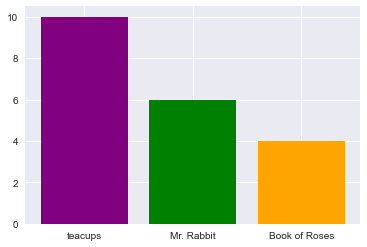

In [212]:
##
population = ['teacups','Mr. Rabbit','Book of Roses']
colors = ['purple','green','orange']
sample = np.random.multinomial(20,[1/2,1/6,2/6])
plt.bar(population,sample,color=colors)

#### Dirichlet Distribution
Suppose that in a given population there are $n$ types or "species". On our next encounter we have a chance $\theta_{i}$ to observe species $i$. Let $X$ be the categorical random variable which returns the observed species. Furthermore, let $\theta = ( \theta_{1} , \dots , \theta_{n} )$ be the corresponding prevalences of each species such that $\sum_{i} \theta_{i} = 1$. We want to estimate the random vector $\theta$. The Dirichlet distribution is being given by:
       $$f ( \theta_{1} , \dots , \theta_{n} ; a_{1} , \dots , a_{n} ) = \frac{1}{ B ( a ) } \prod_{i=1}^{n} \theta_{i}^{a_{i}-1}$$
where $\sum_{i=1}^{n} \theta_{i} = 1 , 1 \geq \theta_{i} \geq 0 , i = 1 , \dots , n$ and $B ( a ) = B ( a_{1} , \dots , a_{n} )$ is the generalized Beta function defined as follows:
      $$B ( a ) = \frac{ \prod_{i=1}^{n} \Gamma ( a_{i} ) }{ \Gamma \left( \sum_{i=1}^{n} a_{i} \right) }.$$

Note that
    \begin{equation}
    \begin{split}
    \theta_{i} \sim B ( a_{i} , a_{0} - a_{i} ) \\
    \end{split}
    \end{equation}
and consequently,
    \begin{equation}
    \begin{split}
    \mathbb{E} [ \theta_{i} ] & = \frac{a_{i}}{a_{0}} \\
    \end{split}
    \end{equation}

### 3 Deers, 2 tea cups and Mr. Rabbit!
##### But, it doesn't make any sense at all!

Suppose that on a trip to the forest we observe 3 rabbits, 2 wolves and 1 bear and these 3 species are the sole species inhabiting the forest. What is the chance to a bear on the next animal encounter? We have
\begin{equation}
\begin{split}
& P ( \theta_{1} , \dots , \theta_{n} | X_{1} = x_{1} , \dots , X_{m} = X_{m} ) \\
= & \frac{ P ( X_{1} = x_{1} , \dots , X_{m} = x_{m} | \theta_{1} , \dots , \theta_{n} ) P ( \theta_{1} , \dots , \theta_{n} ) }{ \int_{ \theta_{1} , \dots , \theta_{n} } P ( X_{1} = x_{1} , \dots , X_{m} = x_{m} | \theta_{1} , \dots , \theta_{n} ) P ( \theta_{1} , \dots , \theta_{n} ) d \theta_{1} \dots d \theta_{n} } \\
            & = \frac{ \prod_{i=1}^{n} \theta_{i}^{x_{i}} \prod_{i=1}^{n} \theta_{i}^{a_{i}-1} }{ \int_{ \theta_{1} , \dots , \theta_{n} } \prod_{i=1}^{n} \theta_{i}^{x_{i}} \prod_{i=1}^{n} \theta_{i}^{a_{i}-1} d \theta_{1} \dots d \theta_{n} } \\
            & = \frac{ \prod_{i=1}^{n} \theta_{i}^{ x_{i} + a_{i} - 1 } }{ \int_{ \theta_{1} , \dots , \theta_{n} } \prod_{i=1}^{n} \theta_{i}^{x_{i} + a_{i}-1 } d \theta_{1} \dots d \theta_{n} } \\
\end{split}
\end{equation}

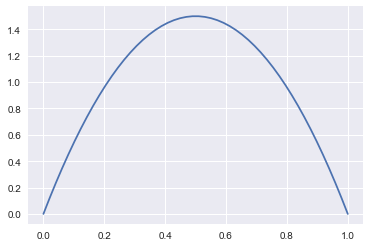

In [324]:
x = np.linspace(0.0001,0.9999)
a , b = 2,2
beta = np.array([scipy.stats.beta.pdf(i,a,b) for i in x])
plt.plot(x,beta)

In [23]:
x = np.array([2,2,2])
y = np.array([2,2,2])
y**x

array([4, 4, 4], dtype=int32)

(0.0001, 0.9999, 0.0001, 0.9999)

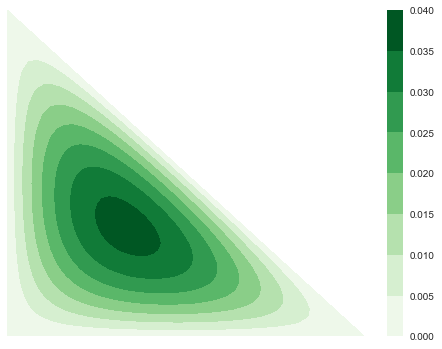

In [199]:
def generalized_beta(a):
    return np.prod(scipy.special.gamma(a))/scipy.special.gamma(sum(a))
    #return math.prod([scipy.special.gamma(i) for i in a])/scipy.special.gamma(sum(a))
    
def dirichlet(x,y,a) -> float:
    return np.where((x+y<=1) & (x>=0) & (y>=0),x**(a[0]-1)*y**(a[1]-1)*(1-x-y)**(a[2]-1),0.0)

def gdirichlet(x,a) -> float:
    if np.any(x<=0): return 0.0
    return np.prod(x**(a-1))/generalized_beta(a) if x.sum() == 1 else 0.0

fig = plt.figure(figsize=(8,6))
a = np.array([2,2,2])
x , y = np.linspace(0.0001,0.9999) , np.linspace(0.0001,0.9999)
X , Y = np.meshgrid(x,y)
#p = np.array([0.2,0.3,0.5])
Z = dirichlet(X,Y,a)
plt.contourf(X,Y,Z,cmap='Greens')
plt.colorbar()
plt.axis('off')

In [213]:
sample = np.random.dirichlet(a)
sample

array([0.19220714, 0.57400416, 0.2337887 ])

##### Exponential Distribution

\begin{equation}
f ( x ; \lambda ) = \lambda e^{ - \lambda x } , \ x \geq 0 , \lambda > 0
\end{equation}

Let's calculate cdf
\begin{equation}
\begin{split}
F_{X} ( x ) & = P ( X \leq x ) \\
            & = \int_{0}^{x} \lambda e^{ - \lambda u } d u \\
            & = \left[ - e^{ - \lambda u } \right]_{0}^{x} \\ 
            & = 1 - e^{ - \lambda x } , \ x \geq 0. \\
\end{split}
\end{equation}

The tail of the exponential distribution is given by
       $$P ( X > x ) = e^{ - \lambda x } , x \geq 0.$$
We note that it vanishes as $x \to \infty$.
Moreover, note that
$$mode ( X ) = \lambda.$$

Median Calculation \
\begin{equation}
\begin{split}
F_{X} ( x ) = p & \implies 1 - e^{ - \lambda x } = p \\
                & \implies e^{ - \lambda x } = 1 - p \\
                & \implies - \lambda x = \log ( 1 - p ) \\
                & \implies x ( p ) = - \frac{1}{ \lambda } \log ( 1 - p ) , \ p \in ( 0 , 1 ) \\
\end{split}
\end{equation}

In particular, for $p = 0.5$ we obtain the median of the exponential distribution:
$$\mathbb{\text{median}} ( X ) =  \frac{ \log 2 }{ \lambda }.$$


Moment Calculation
\begin{equation}
\begin{split}
I_{n} & = \int_{0}^{\infty} \lambda x^{n} e^{ - \lambda x } d x \\
     & = - \left[ x^{n} e^{ -\lambda x } \right]_{0}^{\infty} + n \int_{0}^{\infty} x^{n-1} e^{ - \lambda x } d x \\
     & =  \frac{n}{\lambda} I_{n-1} = \frac{ n ( n - 1 ) }{ \lambda^{2} } I_{n-2} = \cdots = \frac{ n ! }{ \lambda^{n-1} } I_{1} = \frac{n!}{\lambda^{n}}  \\
\end{split}
\end{equation}
Thus,
\begin{equation}
\begin{split}
\mathbb{E} [ X^{n} ] & = \int_{0}^{\infty} \lambda x^{n} e^{ - \lambda x } d x \\
                     & = \frac{n!}{\lambda^{n}} \\
\end{split}
\end{equation}
Moreover, note that
\begin{equation}
\begin{split}
  \mathbb{E} [ X ] & = \frac{1}{ \lambda } \\
  \mathbb{Var} [ X ] & = \mathbb{E} [ X^{2} ] - \left( \mathbb{E} [ X ] \right)^{2} \\
                     & = \frac{2}{ \lambda^{2} } - \frac{1}{\lambda^{2}} \\
                     & = \frac{1}{\lambda^{2}}. \\
\end{split}
\end{equation}

A Primer on Exponential Memorylessness \
Suppose that $X$ is the waiting time on a certain event. $t$ minutes have passed but we have yet to observe the event. How does that alter our expectations?
\begin{equation}
\begin{split}
\mathbb{E} [ X | X > t ] & = \int_{ t }^{ \infty } x \frac{ \lambda e^{ - \lambda x } }{ e^{ - \lambda t } } d x \\
                         & = \int_{ t }^{ \infty } x \lambda e^{ - \lambda ( x - t ) } d x \\
                         & = \left[ - x e^{ - \lambda ( x - t ) } \right]_{ t }^{ \infty } + \int_{ t }^{ \infty } e^{ - \lambda ( x - t ) } d x \\
                         & = t + \left[ - \frac{ e^{ - \lambda ( x - t ) } }{ \lambda } \right]_{ t }^{ \infty } \\
                         & = t + \frac{1}{\lambda} \\
                         & = t + \mathbb{E} [ X ] \\
\end{split}
\end{equation}
That means we have to wait again another $\lambda^{-1}$! The information $X > t$ learned us nothing new about the process. This is due to the memorylessness property of exponential distribution, aka the exponential distribution probabilistically restarts itself.

Text(0.5, 1.0, 'exponential quantile func with lambda = 5.00')

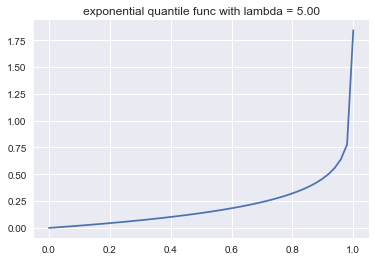

In [3]:
_lambda = 5
p = np.linspace(0.0001,0.9999)
quantile = lambda p , _l : - np.log(1-p)/_l
z = np.array([quantile(i,_lambda) for i in p])
plt.plot(p,z)
plt.title('exponential quantile func with lambda = {:1.2f}'.format(_lambda))

#### Pareto Distribution

\begin{equation}
f_{X} ( x ; a , x_{m} ) = \frac{a x_{m}^{a} }{ x^{a+1} } , \ x \geq x_{m}
\end{equation}

#### Bayesian Inference with Exponential Distribution
\begin{equation}
\begin{split}
L ( X_{1} , \dots , X_{n} | \lambda ) & = \sum_{i=1}^{n} \log f ( X_{i} | \lambda ) \\
               & = \sum_{i=1}^{n} \log \lambda e^{ - \lambda x_{i} } \\
               & = n \log \lambda - \lambda \sum_{i=1}^{n} x_{i}  \\
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\frac{ \partial L }{ \partial \lambda } & = \frac{n}{\lambda} - \sum_{i=1}^{n} x_{i} = 0\\
         \implies \lambda_{MLE} & = \frac{n}{ \sum_{i=1}^{n} x_{i} } = \left( \overline{ X_{n} } \right)^{-1}  \\
\end{split}
\end{equation}

\begin{equation}
\begin{split}
P ( \lambda | X_{1} = x_{1} , \dots , X_{n} = x_{n} ) & = \frac{ P ( X_{1} = x_{1} , \dots , X_{n} = x_{n} | \lambda ) P ( \lambda ) }{ \int_{0}^{\infty} P ( X_{1} = x_{1} , \dots , X_{n} = x_{n} | \lambda ) P ( \lambda ) d \lambda } \\
& = \frac{ \lambda^{n} e^{ - \lambda ( x_{1} + \cdots + x_{n} ) } \lambda^{a-1} e^{ - \lambda b } }{ \int_{0}^{\infty } \lambda^{n} e^{ - \lambda ( x_{1} + \cdots + x_{n} ) } \lambda^{a-1} e^{ - \lambda b } d \lambda } \\
& = \frac{ \lambda^{ n + a - 1 } e^{ - \lambda ( x_{1} + \cdots + x_{n} + b ) } }{ \int_{0}^{\infty } \lambda^{ n + a - 1 } e^{ - \lambda ( x_{1} + \cdots + x_{n} + b ) } d \lambda } \\
& \overset{ u \lambda = y }{ \underset{ u = x_{1} + \cdots + x_{n} + b }{=}} \frac{ \lambda^{ n + a - 1 } e^{ - \lambda ( x_{1} + \cdots + x_{n} + b ) } }{ \int_{0}^{\infty } \frac{ y^{ n + a - 1 } }{ u^{ n + a - 1 } } e^{ - y } \frac{ d y }{ u } } \\
& = \frac{ u^{ n + a } \lambda^{ n + a - 1 } e^{ - \lambda ( x_{1} + \cdots + x_{n} + b ) } }{ \int_{0}^{\infty } y^{ n + a - 1 } e^{ - y } d y } \\
& = \frac{ \lambda^{ n + a - 1 } ( x_{1} + \cdots + x_{n} + a )^{ n + a } e^{ - \lambda ( x_{1} + \cdots + x_{n} + b ) } }{ \Gamma ( n + a ) } \\
\implies \lambda & \sim \Gamma \left( n + a , b + \sum_{i=1}^{n} x_{i} \right) \\ 
\end{split}
\end{equation}

Thus, the Bayes estimator is equal to:
       $$\lambda_{BE} = \mathbb{E} [ \lambda | X ] = \frac{n+a}{b+\sum_{i=1}^{n} x_{i}}.$$

#### Maximum Entropy & Gini Coefficient

Consider a six sided die with probabilities $p_{1} , \dots , p_{n}$ such that $\sum_{i} p_{i} = 1$. We sort the probabilities in increasing order. Then we evaluate the area under the piecewise linearly connected graph:
        $$A = \frac{1}{2n} ( p_{1} + ( 2 p_{1} + p_{2} ) + ( 3 p_{1} + 2 p_{2} + p_{3} ) + \cdots + ( (n-1) p_{1} + \cdots + p_{n-1} ) + ( n p_{1} + (n-1) p_{2} + \cdots + 2 p_{n-1} + p_{n} ) )$$

In [327]:
import numpy as np

def calculate_gini(vals):
    ''''''
    vals = [val for val in vals if val>0]
    total = float(sum(vals))
    vals.extend([0])
    vals.sort()
    length = float(len(vals)) - 1
    vals = [val/total for val in vals]
    cumulative = [sum(vals[:i]) for i in range(1,len(vals)+1,1)]
    return 1 - 2*sum([(i+j)/(2*length) for i , j in zip(cumulative[1:],cumulative[:-1])])

def calculate_entropy(vals):
    ''''''
    try:
        return sum([-val*np.log(val) for val in vals if val>0])
    except Exception as err:
        print(err)

In [328]:
chances = [0.1,0.2,0.3,0.125,0.175,0.1]
calculate_gini(chances)

0.2250000000000001

In [329]:
chances

[0.1, 0.2, 0.3, 0.125, 0.175, 0.1]

In [330]:
calculate_entropy(chances)

1.7085462634786486

In [331]:
def binomial_prob(k,n,p):
    return scipy.special.binom(n,k)*p**k*(1-p)**(n-k)

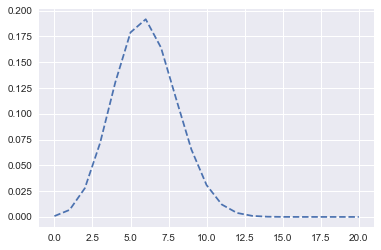

In [332]:
n , p = 20 , 0.3
xs = np.arange(0,n+1,1)
probabilities = np.array([binomial_prob(k,n,p) for k in xs])
plt.plot(xs,probabilities,linestyle='--')

In [333]:
p = np.linspace(0.000001,0.999999,20000)
entropies = np.array([calculate_entropy([binomial_prob(k,n,q) for k in xs]) for q in p])
ginis = np.array([calculate_gini([binomial_prob(k,n,q) for k in xs]) for q in p])
print('Printing min Gini...')
print(ginis.min(),p[ginis.argmin()])
print()
print('Printing max Entropy...')
print(entropies.max(),p[entropies.argmax()])
print()

Printing min Gini...
0.6560046143628506 0.49997499879993995

Printing max Entropy...
2.2234239145132357 0.50002500120006



(0.0, 1.0)

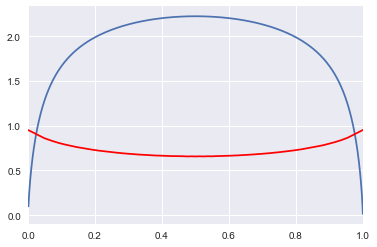

In [334]:
p = np.linspace(0.001,0.9999,2000)
plt.plot(p,[calculate_entropy([binomial_prob(k,n,q) for k in xs]) for q in p])
plt.plot(p,[calculate_gini([binomial_prob(k,n,q) for k in xs]) for q in p],color='red')
plt.xlim(0,1)